# Stochastic Optimization
__Group ALT: Andreea, Laura, Tien__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

## Exercise H7.1: Simulated Annealing
__A: Initialization__

In [45]:
beta_0 = 1.00001
tau = 1.05
t_max = 155

M = [1,20]

s_i = [-1., 1.]
N = 6
s = np.random.choice(s_i, size=N).astype(dtype=np.float128)

W_notsym = np.random.choice(s_i,size=(N,N))
W = np.tril(W_notsym) + np.triu(W_notsym.T)
W[np.absolute(W)>1] = 0

__B: Optimization:__

In [46]:
prob = lambda beta, delta_E: 1 / (1 + np.exp(beta * delta_E))

def total_energy(w,s):
    E = 0
    for s_i in s:
        E -= 0.5*s_i * np.sum(W @ s)
    return E

def energy_si(w,s,i):
    E = 0
    for j,s_j in enumerate(s):
        E -= 0.5*w[i,j]*s[i]*s_j
    return E


In [47]:
def simulated_annealing(s,beta0,m,w,tau,tmax,N):
    """
    performs simulated annealing with initial conditions s0, beta0
    m iterations in the state update loop
    tmax time steps and W weights
    """
    temp = np.zeros(tmax)
    energies = np.zeros(tmax)
    beta = beta0
    
    for annealing in range(tmax):  
        for state_update in range(m):
            i_node = np.random.randint(0,6)

            s_minus = np.copy(s)
            s_minus[i_node] *= -1

            E_si = energy_si(w,s,i_node)
            E_minus_si = energy_si(w,s_minus,i_node)

            deltaE = E_minus_si - E_si

            if np.random.uniform(0,1) <= prob(beta,deltaE):
                s = np.copy(s_minus)

        beta *= tau
        temp[annealing] = 1/beta
        energies[annealing] =  total_energy(w,s)
        
    return temp, energies      
            

__C: Visualization:__

1) Plot the temperature $T_t = \frac{1}{\beta_t}$ and the energy $E(\mathbf{s})$ over the iterations $t=0,...,t_{max}$.

In [48]:
t1, e1 = simulated_annealing(s,beta_0,M[0],W,tau,t_max,N)
t20, e20 = simulated_annealing(s,beta_0,M[1],W,tau,t_max,N)

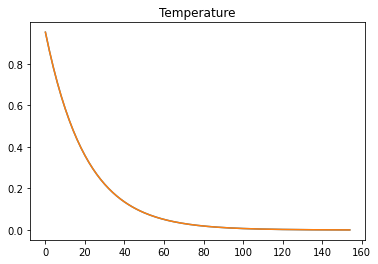

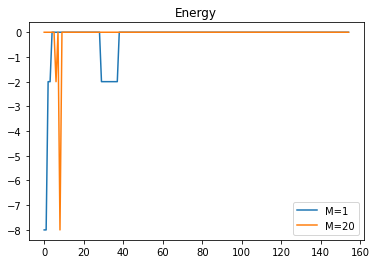

In [49]:
plt.figure()
plt.title("Temperature")
plt.plot(t1, label = "M=1")
plt.plot(t20, label = "M=20");
plt.figure()
plt.title("Energy")
plt.plot(e1, label = "M=1")
plt.plot(e20, label = "M=20")
plt.legend();

## Exercise H7.2:  Mean-Field Annealing

__A: Initialization:__

In [7]:
mean_field = lambda W, s, k, N: -np.sum([W[i, k] * s[i] for i in range(N) if not i == k])

In [8]:
beta_0_mf = 1.05
tau_mf = 1.05
t_max = 155
epsilon = 0.00005
s = np.random.choice(s_i, N)

__B: Optimization:__

In [9]:
def mean_fiel_annealing(beta0, tau, tmax, eps, s, N,w):
    e = np.zeros_like(s)
    beta = beta0
    
    
    ek_old = 0
    
    temp = np.zeros(tmax)
    energies = np.zeros(tmax)
    
    for t in range(tmax):
        dist = 100
        while (dist >= eps):
            e_old = e.copy()
            for k in range(N):

                e[k] = mean_field(w,s,k, N)
                s[k] = np.tanh(-beta*e[k])
                dist = np.linalg.norm(e - e_old)                      

                
        beta *= tau
                
        temp[t] = 1/beta
        energies[t] = total_energy(w,s)
    
    return temp, energies
    
    

In [10]:
t,e = mean_fiel_annealing(beta_0_mf, tau_mf, t_max, epsilon, s, N,W)

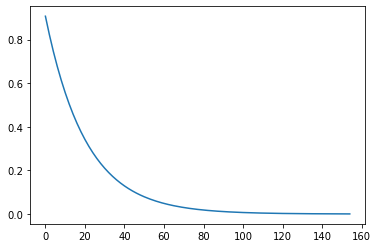

In [11]:
plt.plot(t)

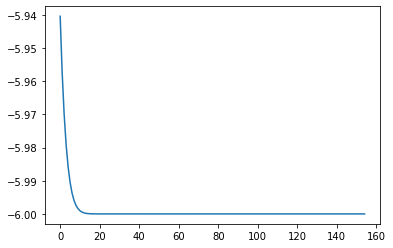

In [12]:
plt.plot(e)